In [1]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import argparse
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt

In [2]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

def show_image(image,title=None,axis=False):
    plt.imshow(image,cmap='gray')
    plt.title(title)
    if not axis:
        plt.axis('off')
    plt.show()

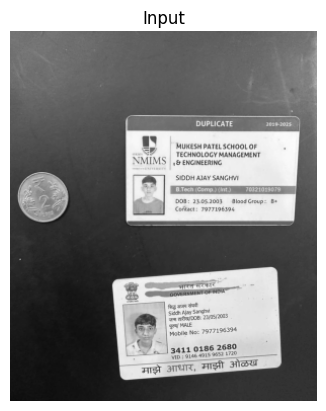

In [3]:
width = 25
image = cv2.imread('images/input2.png')
show_image(image,'Input')

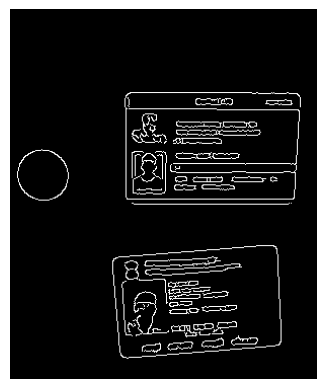

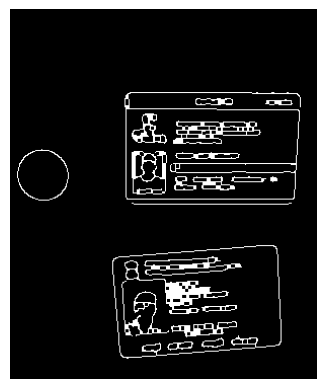

In [4]:
blur = cv2.GaussianBlur(image.copy(), (7, 7), 0)
edged = cv2.Canny(blur, 50, 100)
show_image(edged)
dilated = cv2.dilate(edged, None, iterations=1)
eroded = cv2.erode(dilated, None, iterations=1)
show_image(eroded)

In [5]:
cnts = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("Total number of contours are: ", len(cnts))

(cnts, _) = contours.sort_contours(cnts)
pixelPerMetric = None


count = 0
for c in cnts:
    if cv2.contourArea(c) < 100:
        continue
    count += 1

    orig = image.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")

    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)

    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
        (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

    cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)

    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)), (255, 0, 255), 2)
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)), (255, 0, 255), 2)

    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

    if pixelPerMetric is None:
        pixelPerMetric = dB / width

    dimA = dA / pixelPerMetric
    dimB = dB / pixelPerMetric

    cv2.putText(orig, "{:.1f}mm".format(dimA), (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
    cv2.putText(orig, "{:.1f}mm".format(dimB), (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)

    cv2.imshow("Image", orig)
    cv2.waitKey(0)

Total number of contours are:  6


: 